C. LANGKAH PRAKTIKUM

1. Instalasi Library

In [ ]:
!pip install networkx matplotlib

2. Struktur Data Graf dan Algoritma

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    queue = [ (0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

3. Fungsi untuk Merekonstruksi Jalur

In [ ]:
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert (0, target)
        target = previous[target]
    return path

4. Visualisasi dengan networkx dan matplotlib

In [ ]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Garis tebal untuk jalur terpendek
    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

5. Penggunaan Lengkap

Jarak dari A ke Z: 14
Jalur: A -> B -> D -> E -> Z


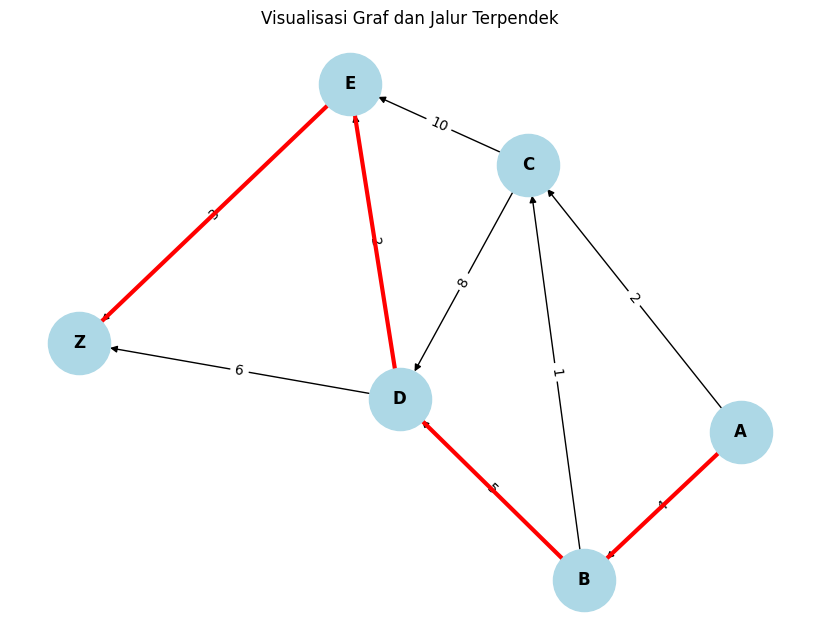

In [32]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

D. LATIHAN / TUGAS

=== Graf dengan Siklus ===
Jarak dari A ke Z: 14
Jalur: A -> B -> D -> E -> Z


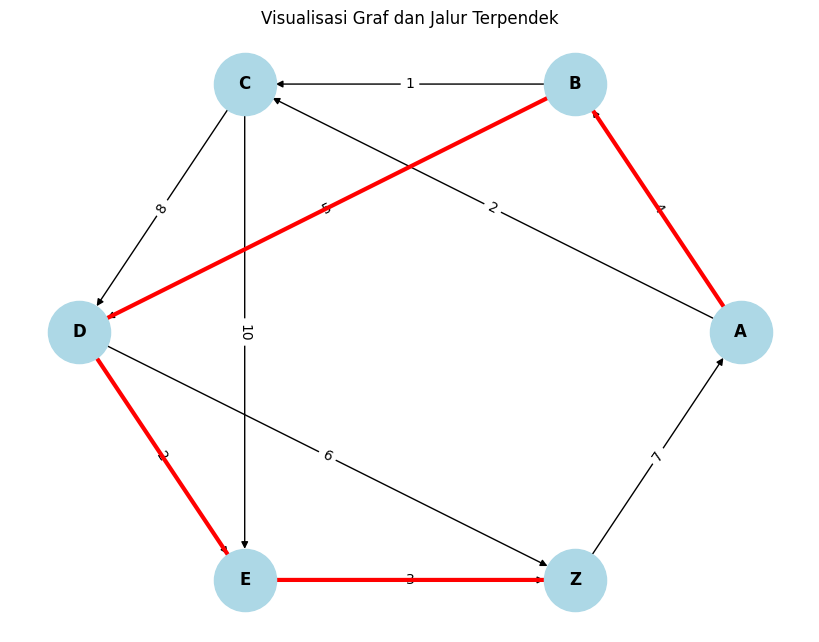


=== Graf dengan Node Baru ===
Jarak dari A ke Z: 9
Jalur: A -> F -> D -> E -> Z


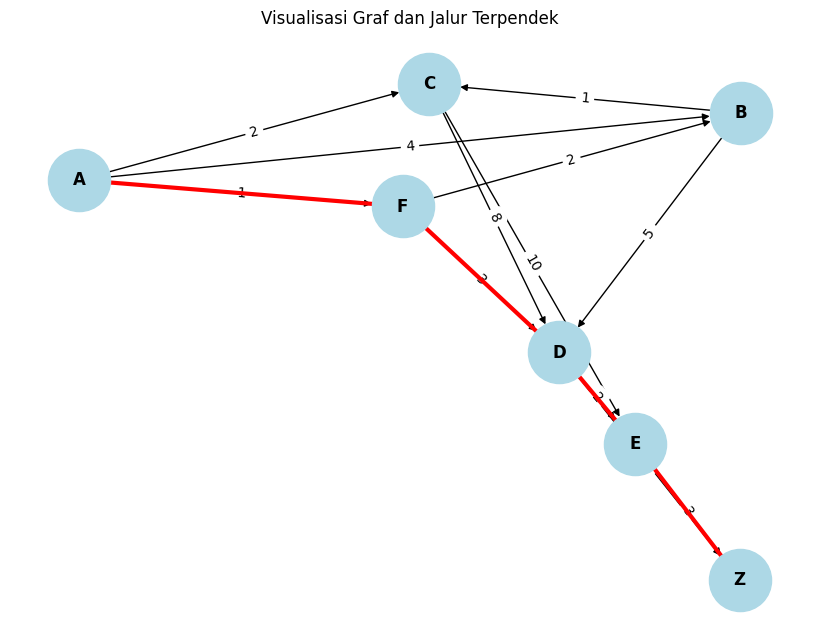

In [33]:
!pip install networkx matplotlib
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None, layout='spring'):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Pilih layout berdasarkan parameter
    if layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

# 1. Graf asli dengan siklus (ditambahkan edge dari Z kembali ke A)
graph_with_cycle = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'A': 7}  # Siklus: Z kembali ke A
}

# 2. Graf dengan simpul baru 'F' dan beberapa edge tambahan
graph_with_new_node = {
    'A': {'B': 4, 'C': 2, 'F': 1},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {},
    'F': {'B': 2, 'D': 3}
}

# Jalankan untuk graf dengan siklus
print("=== Graf dengan Siklus ===")
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph_with_cycle, start_node)
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")
visualize_graph(graph_with_cycle, path=shortest_path, layout='circular')

# Jalankan untuk graf dengan node baru
print("\n=== Graf dengan Node Baru ===")
distances, previous = dijkstra_with_paths(graph_with_new_node, start_node)
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")
visualize_graph(graph_with_new_node, path=shortest_path, layout='kamada_kawai')